In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import multivariate_normal as mvn

In [2]:
# def show_me(X):
#     plt.imshow(X.reshape(28,28))
    
# def show_me_allmean(X,y,k):
#     show_me(sum(X[y==k,:]/len(X[y==k,:])))

In [3]:
# show_me_allmean(X,y,9)

In [4]:
data = pd.read_csv("MNIST_train.csv")
data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [5]:
data.max(axis=0)

Unnamed: 0    59999
index         59999
labels            9
0                 0
1                 0
              ...  
779              62
780               0
781               0
782               0
783               0
Length: 787, dtype: int64

In [6]:
# Sample of the data
data.sample(30, random_state=1)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
15281,15281,15281,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,113,193,254,253,254,253,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,253,252,253,252,253,252,243,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,253,203,122,102,223,254,151,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,131,50,0,0,21,223,253,111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,253,224,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,253,252,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,173,253,254,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41,123,203,253,252,233,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,132,253,254,253,254,253,254,253,163,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,253,252,2

In [7]:
# Shape of the data
data.shape

(60000, 787)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB


In [9]:
data.isnull().sum()

Unnamed: 0    0
index         0
labels        0
0             0
1             0
             ..
779           0
780           0
781           0
782           0
783           0
Length: 787, dtype: int64

In [10]:
data.isna().sum().sum()

0

In [11]:
# Check the column names
data.columns

Index(['Unnamed: 0', 'index', 'labels', '0', '1', '2', '3', '4', '5', '6',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=787)

In [12]:
# Create a copy of the data to proceed with
df = data.copy()

In [13]:
# Drop the "Unnamed" and "index" columns
df.drop(["Unnamed: 0","index"], axis=1, inplace=True)
df.sample(10)

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
50289,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,226,255,198,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,226,255,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,255,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,255,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,255,255,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,255,255,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,86,255,255,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29,255,255,170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,255,255,29,0,0,0,29,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,226,255,141,86,170,226,255,255,255,226,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [14]:
# Count of each digit in dataset
df["labels"].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: labels, dtype: int64

In [15]:
# Row Maximums
df.max(axis=1)

0        255
1        255
2        255
3        255
4        255
        ... 
59995    255
59996    255
59997    255
59998    255
59999    255
Length: 60000, dtype: int64

In [16]:
# Check the datatypes
df.dtypes

labels    int64
0         int64
1         int64
2         int64
3         int64
          ...  
779       int64
780       int64
781       int64
782       int64
783       int64
Length: 785, dtype: object

In [17]:
# Check maximum number in labels
df["labels"].max()

9

In [18]:
# Check for duplicate entries
df.duplicated().sum()

0

In [19]:
# Get statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
labels,60000.0,4.453933,2.88927,0.0,2.0,4.0,7.0,9.0
0,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
2,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
3,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
779,60000.0,0.002000,0.34660,0.0,0.0,0.0,0.0,62.0
780,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
781,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
782,60000.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0


In [20]:
# Column maximums
df.max(axis=0)

labels     9
0          0
1          0
2          0
3          0
          ..
779       62
780        0
781        0
782        0
783        0
Length: 785, dtype: int64

# Prepare data for training

In [21]:
X = df. drop("labels", axis=1)
y = df["labels"]

In [22]:
X.max(axis=1)

0        255
1        255
2        255
3        255
4        255
        ... 
59995    255
59996    255
59997    255
59998    255
59999    255
Length: 60000, dtype: int64

In [23]:
# Scale the X values
X = ((X-X.min()) / (X.max()-X.min() + 1e-100))
X.max(axis=1)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59995    1.0
59996    1.0
59997    1.0
59998    1.0
59999    1.0
Length: 60000, dtype: float64

In [24]:
X = X.to_numpy()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
y = y.to_numpy()
y

array([5, 0, 4, ..., 5, 6, 8])

In [26]:
print(f"X has the shape: {X.shape}")
print(f"y has the shape: {y.shape[0]}")

X has the shape: (60000, 784)
y has the shape: 60000


# Prepare test data

In [27]:
test_data = pd.read_csv("MNIST_test.csv")
test_data

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,

In [28]:
test_data.isna().sum().sum()

0

In [29]:
# Drop the "Unnamed" and "index" columns
test_data.drop(["Unnamed: 0","index"], axis=1, inplace=True)
test_data.sample(10)

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
6972,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,53,179,254,138,76,133,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,48,145,227,253,253,253,253,254,253,220,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,253,253,253,253,221,216,216,219,253,253,84,0,46,59,6,0,0,0,0,0,0,0,0,0,0,0,0,118,253,253,181,84,12,0,0,4,84,101,68,35,165,253,59,0,0,0,0,0,0,0,0,0,0,0,0,157,253,238,46,0,0,0,0,0,0,9,84,232,253,253,128,0,0,0,0,0,0,0,0,0,0,0,0,123,253,209,18,0,0,0,0,0,0,37,253,253,253,253,36,0,0,0,0,0,0,0,0,0,0,0,0,37,253,253,100,0,0,0,0,0,61,212,253,253,253,143,7,0,0,0,0,0,0,0,0,0,0,0,0,6,134,253,180,0,0,0,0,5,186,253,253,253,144,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,188,246,189,16,0,53,232,253,253,232,58,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
# Randomly split the into validation and test sets
import random
random.seed(42)


val_ratio = 0.6
val_size = int(len(test_data) * val_ratio)


df_val = test_data.sample(n=val_size, random_state=42)
df_test = test_data.drop(df_val.index)

df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
print(f"Validation Set Shape: {df_val.shape} \nTest Set Shape: {df_test.shape} ")

Validation Set Shape: (6000, 785) 
Test Set Shape: (4000, 785) 


In [32]:
df_val

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,183,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,193,254,130,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,153,254,215,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,253,254,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,216,254,204,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,87,254,254,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,244,254,119,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,254,246,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,233,254,204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,254,254,48,0,0,0,0,0,21,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,109,254,251,41,0,0,0,5,157,227,241,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,228,254,201,0,0,0,5,167,254,254,254,228,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,58,254,254,185,0,0,0,121,254,254,238,254,254,57,0,0,0,0,0,0,0,0

In [33]:
df_val["labels"].value_counts()

1    661
2    628
7    618
9    614
3    613
4    591
0    588
8    584
6    581
5    522
Name: labels, dtype: int64

In [34]:
df_test

,labels,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,247,253,198,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,231,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,246,253,159,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,234,253,233,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198,253,253,141,0,0,0,0,0,0,0

In [35]:
df_test["labels"].value_counts()

1    474
7    410
2    404
3    397
9    395
0    392
4    391
8    390
6    377
5    370
Name: labels, dtype: int64

In [36]:
# Scale the X values
X_val = df_val.drop("labels", axis=1)
X_val = ((X_val-X_val.min()) / (X_val.max()-X_val.min() + 1e-100))

X_test = df_test.drop("labels", axis=1)
X_test = ((X_test-X_test.min()) / (X_test.max()-X_test.min() + 1e-100))

In [37]:
X_val = X_val.to_numpy()
X_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
X_test = X_test.to_numpy()
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_val = df_val["labels"].to_numpy()
y_val

array([6, 2, 3, ..., 9, 2, 6])

In [40]:
y_test = df_test["labels"].to_numpy()
y_test

array([2, 4, 1, ..., 1, 4, 6])

# **BUILDING MODELS**

**Performance metric**
-A simple accuracy measure will be used to evaluate the models

In [41]:
# Function to calculate accuracy
def accuracy(y, y_hat):
  return np.mean(np.equal(y, y_hat))


## Model 1: Naive Bayes

In [42]:
class GaussNB1():

  def fit(self, X, y, epsilon = 1e-1):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [43]:
nb1 = GaussNB1()

In [44]:
%%time
nb1.fit(X,y)

CPU times: user 389 ms, sys: 47.6 ms, total: 436 ms
Wall time: 573 ms


In [45]:
%%time
y_train_pred1 = nb1.predict(X)

CPU times: user 31.3 s, sys: 3.34 s, total: 34.6 s
Wall time: 20.8 s


In [46]:
%%time
y_val_pred1 = nb1.predict(X_val)

CPU times: user 4.1 s, sys: 1.64 s, total: 5.75 s
Wall time: 3.91 s


### Perfomance: Model 1

In [47]:
# Accuracy on Train data
trainAccuracy1 = accuracy(y, y_train_pred1)
print("Model 1 \n Train Accuracy:", trainAccuracy1)

Model 1 
 Train Accuracy: 0.7650833333333333


In [48]:
# Accuracy on Validation data
valAccuracy1 = accuracy(y_val, y_val_pred1)
print("Model 1 \n Validation Accuracy:", valAccuracy1)

Model 1 
 Validation Accuracy: 0.78


## Model 2: Naive Bayes

In [49]:
class GaussNB2():

  def fit(self, X, y, epsilon = 1e-2):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [50]:
nb2 = GaussNB2()

In [51]:
%%time
nb2.fit(X,y)

CPU times: user 352 ms, sys: 54.8 ms, total: 407 ms
Wall time: 394 ms


In [52]:
%%time
y_train_pred2 = nb2.predict(X)

CPU times: user 32.4 s, sys: 3.24 s, total: 35.6 s
Wall time: 19.2 s


In [53]:
%%time
y_val_pred2 = nb2.predict(X_val)

CPU times: user 4.08 s, sys: 1.56 s, total: 5.64 s
Wall time: 3.85 s


### Perfomance: Model 2

In [54]:
# Accuracy on Train data
trainAccuracy2 = accuracy(y, y_train_pred2)
print("Model 2 \n Train Accuracy:", trainAccuracy2)

Model 2 
 Train Accuracy: 0.8015666666666666


In [55]:
# Accuracy on Validation data
valAccuracy2 = accuracy(y_val, y_val_pred2)
print("Model 2 \n Validation Accuracy:", valAccuracy2)

Model 2 
 Validation Accuracy: 0.8115


## Model 3: Naive Bayes

In [56]:
class GaussNB3():

  def fit(self, X, y, epsilon = 1e-3):
    self.likelihoods = dict()
    self.priors = dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k]
      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k)/len(X)

  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k,l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"]) + np.log(self.priors[k])
    return P_hat.argmax(axis=1)

In [57]:
nb3 = GaussNB3()

In [58]:
%%time
nb3.fit(X,y)

CPU times: user 333 ms, sys: 85.5 ms, total: 418 ms
Wall time: 377 ms


In [59]:
%%time
y_train_pred3 = nb3.predict(X)

CPU times: user 32.3 s, sys: 3.3 s, total: 35.6 s
Wall time: 19.2 s


In [60]:
%%time
y_val_pred3 = nb3.predict(X_val)

CPU times: user 4.26 s, sys: 1.75 s, total: 6.01 s
Wall time: 3.69 s


### Perfomance: Model 3

In [61]:
# Accuracy on Train data
trainAccuracy3 = accuracy(y, y_train_pred3)
print("Model 3 \n Train Accuracy:", trainAccuracy3)

Model 3 
 Train Accuracy: 0.76795


In [62]:
# Accuracy on Validation data
valAccuracy3 = accuracy(y_val, y_val_pred3)
print("Model 3 \n Validation Accuracy:", valAccuracy3)

Model 3 
 Validation Accuracy: 0.7728333333333334


## Model 4: Bayes

In [63]:
class  GaussBayes1():

  def fit(self, X,y,epsilon =1e-3):
    self.likelihoods=dict()
    self.priors=dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D =X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k )+epsilon*np.identity(D)}
      self.priors[k] =len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape

    P_hat = np.zeros((N, len(self.K))) 
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [64]:
bay1 = GaussBayes1()

In [65]:
%%time
bay1.fit(X,y)

CPU times: user 3.39 s, sys: 489 ms, total: 3.88 s
Wall time: 2.39 s


In [66]:
%%time
y_train_pred4 = bay1.predict(X)

CPU times: user 32.4 s, sys: 3.35 s, total: 35.8 s
Wall time: 19.7 s


In [67]:
%%time
y_val_pred4 = bay1.predict(X_val)

CPU times: user 4.46 s, sys: 1.69 s, total: 6.15 s
Wall time: 4.5 s


### Perfomance: Model 4

In [68]:
# Accuracy on Train data
trainAccuracy4 = accuracy(y, y_train_pred4)
print("Model 4 \n Train Accuracy:", trainAccuracy4)

Model 4 
 Train Accuracy: 0.9303166666666667


In [69]:
# Accuracy on Validation data
valAccuracy4 = accuracy(y_val, y_val_pred4)
print("Model 4 \n Validation Accuracy:", valAccuracy4)

Model 4 
 Validation Accuracy: 0.9065


## Model 5: Bayes

In [70]:
class  GaussBayes2():

  def fit(self, X,y,epsilon =1e-2):
    self.likelihoods=dict()
    self.priors=dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D =X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k )+epsilon*np.identity(D)}
      self.priors[k] =len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape

    P_hat = np.zeros((N, len(self.K))) 
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [71]:
bay2 = GaussBayes2()

In [72]:
%%time
bay2.fit(X,y)

CPU times: user 3.64 s, sys: 527 ms, total: 4.17 s
Wall time: 2.19 s


In [73]:
%%time
y_train_pred5 = bay2.predict(X)

CPU times: user 32.3 s, sys: 3.39 s, total: 35.6 s
Wall time: 19.9 s


In [74]:
%%time
y_val_pred5 = bay2.predict(X_val)

CPU times: user 4.68 s, sys: 1.94 s, total: 6.62 s
Wall time: 3.7 s


### Perfomance: Model 5

In [75]:
# Accuracy on Train data
trainAccuracy5 = accuracy(y, y_train_pred5)
print("Model 5 \n Train Accuracy:", trainAccuracy5)

Model 5 
 Train Accuracy: 0.9555333333333333


In [76]:
# Accuracy on Validation data
valAccuracy5 = accuracy(y_val, y_val_pred5)
print("Model 5 \n Validation Accuracy:", valAccuracy5)

Model 5 
 Validation Accuracy: 0.9461666666666667


## Model 6: Bayes

In [77]:
class  GaussBayes3():

  def fit(self, X,y,epsilon = 0.1):
    self.likelihoods=dict()
    self.priors=dict()

    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k,:]
      N_k, D =X_k.shape
      mu_k = X_k.mean(axis=0)

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k )+epsilon*np.identity(D)}
      self.priors[k] =len(X_k)/len(X)

  def predict(self, X):
    N,D =X.shape

    P_hat = np.zeros((N, len(self.K))) 
    for k, l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"])+ np.log(self.priors[k])

    return P_hat.argmax(axis=1)

In [78]:
bay3 = GaussBayes3()

In [79]:
%%time
bay3.fit(X,y)

CPU times: user 3.65 s, sys: 582 ms, total: 4.23 s
Wall time: 2.21 s


In [80]:
%%time
y_train_pred6 = bay3.predict(X)

CPU times: user 32 s, sys: 3.36 s, total: 35.4 s
Wall time: 20 s


In [81]:
%%time
y_val_pred6 = bay3.predict(X_val)

CPU times: user 4.75 s, sys: 2 s, total: 6.75 s
Wall time: 3.49 s


### Perfomance: Model 6

In [82]:
# Accuracy on Train data
trainAccuracy6 = accuracy(y, y_train_pred6)
print("Model 6 \n Train Accuracy:", trainAccuracy6)

Model 6 
 Train Accuracy: 0.9548666666666666


In [83]:
# Accuracy on Validation data
valAccuracy6 = accuracy(y_val, y_val_pred6)
print("Model 6 \n Validation Accuracy:", valAccuracy6)

Model 6 
 Validation Accuracy: 0.9538333333333333


# **FINAL MODEL SELECTION**

In [84]:
# Performance comparison

perf_dict = {
    'Model':['Model 1: NaiveBayes1', 'Model 2: NaiveBayes2', 'Model 3: NaiveBayes3',
              'Model 4: Bayes1', 'Model 5: Bayes2', 'Model 6: Bayes3'],
    'Train Accuracy':[trainAccuracy1, trainAccuracy2, trainAccuracy3, trainAccuracy4, trainAccuracy5,
                       trainAccuracy6],
    'Validation Accuracy':[valAccuracy1, valAccuracy2, valAccuracy3, valAccuracy4, valAccuracy5,
                            valAccuracy6]
}


pd.DataFrame(perf_dict)

,Model,Train Accuracy,Validation Accuracy
0,Model 1: NaiveBayes1,0.765083,0.780000
1,Model 2: NaiveBayes2,0.801567,0.811500
2,Model 3: NaiveBayes3,0.767950,0.772833
3,Model 4: Bayes1,0.930317,0.906500
4,Model 5: Bayes2,0.955533,0.946167
5,Model 6: Bayes3,0.954867,0.953833


- Models 4,5, and 6 are potential candidates to test, as they meet the benchmark of validation data.

## **Performance on Test data**

In [85]:
%%time
# Test Predictions

y_test_pred4 = bay1.predict(X_test)
y_test_pred5 = bay2.predict(X_test)
y_test_pred6 = bay3.predict(X_test)

CPU times: user 10.8 s, sys: 5.4 s, total: 16.2 s
Wall time: 9.22 s


In [86]:
# Accuracy on Test data

testAccuracy4 = accuracy(y_test, y_test_pred4)
testAccuracy5 = accuracy(y_test, y_test_pred5)
testAccuracy6 = accuracy(y_test, y_test_pred6)

print("Model 4 \n Test Accuracy:", testAccuracy4)
print("Model 5 \n Test Accuracy:", testAccuracy5)
print("Model 6 \n Test Accuracy:", testAccuracy6)

Model 4 
 Test Accuracy: 0.9155
Model 5 
 Test Accuracy: 0.94875
Model 6 
 Test Accuracy: 0.95475


In [87]:
# Final Performance comparison

perf_dict = {
    'Model':['Model 4', 'Model 5', 'Model 6'],
    'Train Accuracy':[trainAccuracy4, trainAccuracy5, trainAccuracy6],
    'Validation Accuracy':[valAccuracy4, valAccuracy5, valAccuracy6],
    'Test Accuracy':[testAccuracy4, testAccuracy5, testAccuracy6]
}


pd.DataFrame(perf_dict)

,Model,Train Accuracy,Validation Accuracy,Test Accuracy
0,Model 4,0.930317,0.906500,0.91550
1,Model 5,0.955533,0.946167,0.94875
2,Model 6,0.954867,0.953833,0.95475


## **Confusion Matrix**

Text(0.5, 47.7222222222222, 'Predicted label')

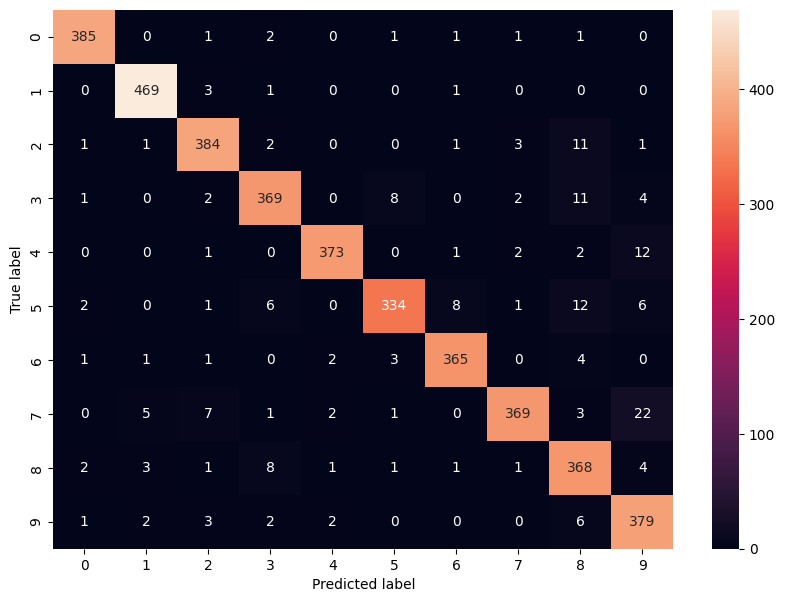

In [88]:
# Confusion Matrix
plt.figure(figsize=(10,7))
cm = pd.crosstab(y_test, y_test_pred5)
ax = sns.heatmap(cm, annot=True, fmt="d")
plt.ylabel('True label')
plt.xlabel('Predicted label')